# 1.正则化

### 过拟合
发生过拟合的两大原因：
* 模型拥有大量参数、表现能力强。
* 训练数据少。

epoch:0, train acc:0.08666666666666667, test acc:0.1068
epoch:1, train acc:0.12333333333333334, test acc:0.1276
epoch:2, train acc:0.16, test acc:0.1519
epoch:3, train acc:0.18333333333333332, test acc:0.172
epoch:4, train acc:0.21, test acc:0.1911
epoch:5, train acc:0.24333333333333335, test acc:0.2187
epoch:6, train acc:0.27666666666666667, test acc:0.2405
epoch:7, train acc:0.30666666666666664, test acc:0.2541
epoch:8, train acc:0.32666666666666666, test acc:0.2612
epoch:9, train acc:0.3333333333333333, test acc:0.2653
epoch:10, train acc:0.31666666666666665, test acc:0.2687
epoch:11, train acc:0.33, test acc:0.2765
epoch:12, train acc:0.3333333333333333, test acc:0.2669
epoch:13, train acc:0.3433333333333333, test acc:0.2785
epoch:14, train acc:0.37333333333333335, test acc:0.2917
epoch:15, train acc:0.4033333333333333, test acc:0.3017
epoch:16, train acc:0.4, test acc:0.3016
epoch:17, train acc:0.43, test acc:0.3154
epoch:18, train acc:0.46, test acc:0.3512
epoch:19, train acc:0.4

epoch:169, train acc:1.0, test acc:0.7651
epoch:170, train acc:1.0, test acc:0.7674
epoch:171, train acc:1.0, test acc:0.767
epoch:172, train acc:1.0, test acc:0.766
epoch:173, train acc:1.0, test acc:0.7679
epoch:174, train acc:1.0, test acc:0.7671
epoch:175, train acc:1.0, test acc:0.7678
epoch:176, train acc:1.0, test acc:0.7666
epoch:177, train acc:1.0, test acc:0.7667
epoch:178, train acc:1.0, test acc:0.7648
epoch:179, train acc:1.0, test acc:0.7672
epoch:180, train acc:1.0, test acc:0.7683
epoch:181, train acc:1.0, test acc:0.7679
epoch:182, train acc:1.0, test acc:0.7688
epoch:183, train acc:1.0, test acc:0.7691
epoch:184, train acc:1.0, test acc:0.7694
epoch:185, train acc:1.0, test acc:0.7688
epoch:186, train acc:1.0, test acc:0.7693
epoch:187, train acc:1.0, test acc:0.77
epoch:188, train acc:1.0, test acc:0.7712
epoch:189, train acc:1.0, test acc:0.7696
epoch:190, train acc:1.0, test acc:0.7696
epoch:191, train acc:1.0, test acc:0.7698
epoch:192, train acc:1.0, test acc:0.7

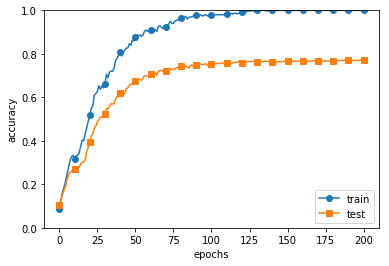

In [3]:
# coding: utf-8

#为了满足过拟合的两个条件，制造过拟合现象。从数据集中只选了300个，并且增加了网络的复杂度。

import os
import sys

sys.path.append(os.pardir)  # 为了导入父目录的文件而进行的设定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 为了再现过拟合，减少学习数据
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（权值衰减）的设定 =======================
#weight_decay_lambda = 0 # 不使用权值衰减的情况
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01)

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 3.绘制图形==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

从上图看出，过了100个epoch左右后，用训练数据测量的识别精度几乎达到了100%.但是，对于测试数据，离100%的识别精度还有较大的差距。如此大的识别精度差距，说明模型在训练阶段出现了过拟合。

### 权值衰减

权值衰减是一直以来经常被使用的一种抑制过拟合的方法。该方法通过在学习的过程中对大的权重进行惩罚，来抑制过拟合。很多过拟合原本就是因为权重参数取值过大才发生的。

epoch:0, train acc:0.13, test acc:0.1135
epoch:1, train acc:0.13333333333333333, test acc:0.1137
epoch:2, train acc:0.13333333333333333, test acc:0.1145
epoch:3, train acc:0.14, test acc:0.1157
epoch:4, train acc:0.14666666666666667, test acc:0.1166
epoch:5, train acc:0.14666666666666667, test acc:0.1223
epoch:6, train acc:0.16333333333333333, test acc:0.1323
epoch:7, train acc:0.18, test acc:0.1493
epoch:8, train acc:0.2, test acc:0.1621
epoch:9, train acc:0.21666666666666667, test acc:0.1687
epoch:10, train acc:0.26, test acc:0.184
epoch:11, train acc:0.30666666666666664, test acc:0.2104
epoch:12, train acc:0.31333333333333335, test acc:0.222
epoch:13, train acc:0.33, test acc:0.2287
epoch:14, train acc:0.3333333333333333, test acc:0.2346
epoch:15, train acc:0.38, test acc:0.2583
epoch:16, train acc:0.3933333333333333, test acc:0.2703
epoch:17, train acc:0.4166666666666667, test acc:0.2858
epoch:18, train acc:0.44666666666666666, test acc:0.3164
epoch:19, train acc:0.45, test acc:0.3

epoch:162, train acc:0.8533333333333334, test acc:0.7234
epoch:163, train acc:0.8566666666666667, test acc:0.7257
epoch:164, train acc:0.86, test acc:0.7319
epoch:165, train acc:0.8533333333333334, test acc:0.7292
epoch:166, train acc:0.8533333333333334, test acc:0.7269
epoch:167, train acc:0.86, test acc:0.7291
epoch:168, train acc:0.8633333333333333, test acc:0.7258
epoch:169, train acc:0.87, test acc:0.7327
epoch:170, train acc:0.8833333333333333, test acc:0.7371
epoch:171, train acc:0.8566666666666667, test acc:0.7357
epoch:172, train acc:0.8733333333333333, test acc:0.7357
epoch:173, train acc:0.86, test acc:0.7329
epoch:174, train acc:0.87, test acc:0.7295
epoch:175, train acc:0.86, test acc:0.729
epoch:176, train acc:0.85, test acc:0.724
epoch:177, train acc:0.87, test acc:0.7275
epoch:178, train acc:0.8666666666666667, test acc:0.7311
epoch:179, train acc:0.87, test acc:0.7346
epoch:180, train acc:0.8633333333333333, test acc:0.7323
epoch:181, train acc:0.8766666666666667, test

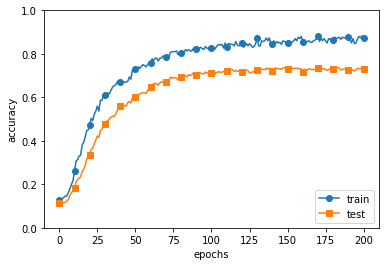

In [5]:
# coding: utf-8

#应用λ=0.1的权值衰减进行训练。

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 为了再现过拟合，减少学习数据
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（权值衰减）的设定 =======================
#weight_decay_lambda = 0 # 不使用权值衰减的情况
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01)

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 3.绘制图形==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

从上图看出，虽然训练数据的识别精度和测试数据的识别精度之间有差距，但是与没有使用权值衰减的结果相比，差距变小了很多。这说明过拟合受到了抑制。此外，还要注意，训练数据的识别精度没有达到100%

### Dropout

权值衰减可以在某种程度上抑制过拟合，但是如果网络的模型变得很复杂，只有权值衰减就难以应对了。在这种情况下，我们经常会使用Dropout方法。Dropout 是一种在学习的过程中随机删除神经元的方法。训练时，随机选出隐藏层的神经元，然后将其删除。被删除的神经元不再进行信号的传递，

train loss:2.2870177283132924
=== epoch:1, train acc:0.08, test acc:0.0855 ===
train loss:2.2785806915916953
train loss:2.279899824127358
train loss:2.2632782695539
=== epoch:2, train acc:0.09666666666666666, test acc:0.0934 ===
train loss:2.2368964430051146
train loss:2.2242071949726823
train loss:2.1659815460009697
=== epoch:3, train acc:0.12333333333333334, test acc:0.0997 ===
train loss:2.190426366385687
train loss:2.258910026950359
train loss:2.2045667666271513
=== epoch:4, train acc:0.14666666666666667, test acc:0.1124 ===
train loss:2.2165783487630493
train loss:2.202750468669824
train loss:2.173310806721542
=== epoch:5, train acc:0.19666666666666666, test acc:0.1386 ===
train loss:2.1293211659098357
train loss:2.168189524385157
train loss:2.1587558956892052
=== epoch:6, train acc:0.28, test acc:0.1741 ===
train loss:2.106678243684419
train loss:2.0788003155183836
train loss:2.059713687033689
=== epoch:7, train acc:0.3466666666666667, test acc:0.226 ===
train loss:2.198502756505

train loss:0.4131673394795575
=== epoch:56, train acc:0.93, test acc:0.6888 ===
train loss:0.41297691733115305
train loss:0.41144489810914814
train loss:0.3529861767360272
=== epoch:57, train acc:0.9366666666666666, test acc:0.6862 ===
train loss:0.4089537486467206
train loss:0.3626639475174317
train loss:0.38403141980087285
=== epoch:58, train acc:0.9233333333333333, test acc:0.6872 ===
train loss:0.3596941809985935
train loss:0.3658026730866608
train loss:0.3539145554366836
=== epoch:59, train acc:0.9266666666666666, test acc:0.6873 ===
train loss:0.33362727204726317
train loss:0.32100620245527145
train loss:0.3072131778597093
=== epoch:60, train acc:0.9366666666666666, test acc:0.6916 ===
train loss:0.30317468132056424
train loss:0.35113530060650716
train loss:0.44375375436280345
=== epoch:61, train acc:0.9333333333333333, test acc:0.6856 ===
train loss:0.30772364379399514
train loss:0.3447393747518685
train loss:0.3936744810926323
=== epoch:62, train acc:0.94, test acc:0.6974 ===
t

=== epoch:110, train acc:1.0, test acc:0.737 ===
train loss:0.08243771788554585
train loss:0.08085146215769709
train loss:0.08330643889762392
=== epoch:111, train acc:0.9966666666666667, test acc:0.7366 ===
train loss:0.09051445097416787
train loss:0.08691426974617432
train loss:0.08890857786316858
=== epoch:112, train acc:0.9966666666666667, test acc:0.736 ===
train loss:0.07032248284311197
train loss:0.06856071935761772
train loss:0.07029858460913121
=== epoch:113, train acc:0.9966666666666667, test acc:0.7374 ===
train loss:0.06554570900897028
train loss:0.06033107763116277
train loss:0.07104798454849362
=== epoch:114, train acc:1.0, test acc:0.7381 ===
train loss:0.07735017183443328
train loss:0.08004210579352547
train loss:0.05836957194339622
=== epoch:115, train acc:1.0, test acc:0.7356 ===
train loss:0.060465339518634885
train loss:0.06559712162232118
train loss:0.05767945409162054
=== epoch:116, train acc:1.0, test acc:0.7394 ===
train loss:0.055776814888618735
train loss:0.071

=== epoch:167, train acc:1.0, test acc:0.7517 ===
train loss:0.020829934932470456
train loss:0.032407333336532805
train loss:0.028555569262165646
=== epoch:168, train acc:1.0, test acc:0.7517 ===
train loss:0.026867956972068056
train loss:0.026740974041708367
train loss:0.026579863709161863
=== epoch:169, train acc:1.0, test acc:0.7519 ===
train loss:0.01965525565909538
train loss:0.025558296641672733
train loss:0.02148485405759542
=== epoch:170, train acc:1.0, test acc:0.7532 ===
train loss:0.02534613552517316
train loss:0.025293246512685063
train loss:0.022171695396703196
=== epoch:171, train acc:1.0, test acc:0.7531 ===
train loss:0.02206662670124016
train loss:0.023170869017004093
train loss:0.021631509014233507
=== epoch:172, train acc:1.0, test acc:0.7527 ===
train loss:0.02301769011858395
train loss:0.024018599549510106
train loss:0.027846282936618262
=== epoch:173, train acc:1.0, test acc:0.7547 ===
train loss:0.024423089469158273
train loss:0.02911620608791714
train loss:0.027

=== epoch:224, train acc:1.0, test acc:0.7561 ===
train loss:0.012929258940566131
train loss:0.01802191889395199
train loss:0.014982894213889743
=== epoch:225, train acc:1.0, test acc:0.7583 ===
train loss:0.013764418918612764
train loss:0.01424152800715251
train loss:0.013557234015609041
=== epoch:226, train acc:1.0, test acc:0.7573 ===
train loss:0.015076829692252802
train loss:0.009660779114813077
train loss:0.012501698268000374
=== epoch:227, train acc:1.0, test acc:0.7574 ===
train loss:0.01454474101342307
train loss:0.00999593863698478
train loss:0.015613919692542569
=== epoch:228, train acc:1.0, test acc:0.7571 ===
train loss:0.012876101598349511
train loss:0.01215489487959934
train loss:0.010581705424413036
=== epoch:229, train acc:1.0, test acc:0.7565 ===
train loss:0.013728613142594713
train loss:0.012700846312057429
train loss:0.012153105922014962
=== epoch:230, train acc:1.0, test acc:0.7571 ===
train loss:0.016256342821128512
train loss:0.01366883358720925
train loss:0.014

=== epoch:281, train acc:1.0, test acc:0.7614 ===
train loss:0.010702390994722305
train loss:0.010490740164136071
train loss:0.008476290638238921
=== epoch:282, train acc:1.0, test acc:0.7605 ===
train loss:0.00781579546453391
train loss:0.010003006967110348
train loss:0.008877361465922886
=== epoch:283, train acc:1.0, test acc:0.7608 ===
train loss:0.010017070615524466
train loss:0.009232504067143158
train loss:0.007180454598794992
=== epoch:284, train acc:1.0, test acc:0.7608 ===
train loss:0.009496783930427547
train loss:0.008160526666505189
train loss:0.009551154095053499
=== epoch:285, train acc:1.0, test acc:0.7592 ===
train loss:0.009006278975334093
train loss:0.007636654917018929
train loss:0.011310112718461445
=== epoch:286, train acc:1.0, test acc:0.7593 ===
train loss:0.008317751139454847
train loss:0.010744121751812798
train loss:0.008777695714500105
=== epoch:287, train acc:1.0, test acc:0.7605 ===
train loss:0.007858471515491426
train loss:0.009026922122962362
train loss:

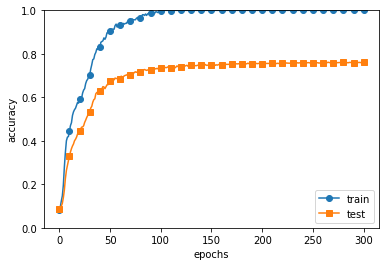

In [7]:
# coding: utf-8

#不实用Dropout的实验
import os
import sys
sys.path.append(os.pardir)  # 为了导入父目录的文件而进行的设定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 为了再现过拟合，减少学习数据
x_train = x_train[:300]
t_train = t_train[:300]

# 设定是否使用Dropuout，以及比例 ========================
use_dropout = False  # 不使用Dropout的情况下为False
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# 绘制图形==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

train loss:2.292303251504743
=== epoch:1, train acc:0.07666666666666666, test acc:0.0892 ===
train loss:2.2837544727712626
train loss:2.3015345019911955
train loss:2.3012135581082394
=== epoch:2, train acc:0.09333333333333334, test acc:0.0889 ===
train loss:2.3039153202752454
train loss:2.2941427150414233
train loss:2.2827043366745525
=== epoch:3, train acc:0.1, test acc:0.0914 ===
train loss:2.287940100929749
train loss:2.289583174666252
train loss:2.286753229804986
=== epoch:4, train acc:0.10666666666666667, test acc:0.0933 ===
train loss:2.299956133247506
train loss:2.2871686186063807
train loss:2.2934482165148884
=== epoch:5, train acc:0.11333333333333333, test acc:0.0941 ===
train loss:2.286263723907864
train loss:2.29381426407705
train loss:2.295954267435014
=== epoch:6, train acc:0.12333333333333334, test acc:0.0994 ===
train loss:2.28120552108638
train loss:2.286303270790881
train loss:2.2831090596737282
=== epoch:7, train acc:0.12333333333333334, test acc:0.1024 ===
train loss

=== epoch:57, train acc:0.25, test acc:0.2132 ===
train loss:2.174807709538966
train loss:2.1458267526097146
train loss:2.1981794513185204
=== epoch:58, train acc:0.24333333333333335, test acc:0.2093 ===
train loss:2.1555402999835884
train loss:2.219490770303321
train loss:2.192930237524258
=== epoch:59, train acc:0.24666666666666667, test acc:0.2097 ===
train loss:2.2198206140592016
train loss:2.187417570039855
train loss:2.210146230834549
=== epoch:60, train acc:0.25333333333333335, test acc:0.2121 ===
train loss:2.20134166827605
train loss:2.1646378867962768
train loss:2.2033824479949713
=== epoch:61, train acc:0.25666666666666665, test acc:0.2147 ===
train loss:2.196594662545626
train loss:2.170951937548415
train loss:2.158663304917277
=== epoch:62, train acc:0.25666666666666665, test acc:0.2143 ===
train loss:2.1763302997630367
train loss:2.229234669612006
train loss:2.132276432981323
=== epoch:63, train acc:0.26, test acc:0.2152 ===
train loss:2.1546361878233795
train loss:2.1361

=== epoch:113, train acc:0.31333333333333335, test acc:0.2524 ===
train loss:2.06251631206234
train loss:2.0633993054986015
train loss:2.0047818353457476
=== epoch:114, train acc:0.3, test acc:0.253 ===
train loss:1.9907038567500837
train loss:2.0368874704901567
train loss:1.9770084059126103
=== epoch:115, train acc:0.30333333333333334, test acc:0.2544 ===
train loss:1.9432548365232365
train loss:1.9840619932630192
train loss:2.030634600040064
=== epoch:116, train acc:0.31333333333333335, test acc:0.2564 ===
train loss:1.9853763769688704
train loss:1.980325251665579
train loss:1.9823394591381438
=== epoch:117, train acc:0.30666666666666664, test acc:0.2534 ===
train loss:2.045119296421687
train loss:1.9297980632818525
train loss:2.036201713419307
=== epoch:118, train acc:0.31, test acc:0.2571 ===
train loss:1.9507395953115267
train loss:1.977094066225702
train loss:1.9798728832796997
=== epoch:119, train acc:0.31333333333333335, test acc:0.2594 ===
train loss:1.9052661235414867
train l

=== epoch:168, train acc:0.4033333333333333, test acc:0.3485 ===
train loss:1.6664466413494798
train loss:1.8484673842728756
train loss:1.8339185842684367
=== epoch:169, train acc:0.4033333333333333, test acc:0.3471 ===
train loss:1.7185045459259998
train loss:1.7693763113782566
train loss:1.7932168258798564
=== epoch:170, train acc:0.4, test acc:0.3463 ===
train loss:1.7327349540957884
train loss:1.829596875962186
train loss:1.845098599243136
=== epoch:171, train acc:0.4033333333333333, test acc:0.347 ===
train loss:1.721214153025065
train loss:1.788756966523729
train loss:1.7640105359322402
=== epoch:172, train acc:0.41, test acc:0.3473 ===
train loss:1.7484025126180447
train loss:1.8022636909937848
train loss:1.8294032086338448
=== epoch:173, train acc:0.41333333333333333, test acc:0.3525 ===
train loss:1.693619514918674
train loss:1.8170466430514745
train loss:1.7138865060212145
=== epoch:174, train acc:0.41, test acc:0.3506 ===
train loss:1.801489534396401
train loss:1.72449669485

=== epoch:224, train acc:0.5966666666666667, test acc:0.4857 ===
train loss:1.516629685254774
train loss:1.6551425055155886
train loss:1.5319258933671744
=== epoch:225, train acc:0.5966666666666667, test acc:0.4848 ===
train loss:1.6742867542610012
train loss:1.6558685168430742
train loss:1.6188048379454643
=== epoch:226, train acc:0.6, test acc:0.4865 ===
train loss:1.6269055231094325
train loss:1.55725073265442
train loss:1.5103997612922813
=== epoch:227, train acc:0.6, test acc:0.4885 ===
train loss:1.552471721622093
train loss:1.5498487937176921
train loss:1.4579693042932051
=== epoch:228, train acc:0.6133333333333333, test acc:0.4978 ===
train loss:1.619908779665646
train loss:1.6086035550255346
train loss:1.529264075887361
=== epoch:229, train acc:0.6166666666666667, test acc:0.4969 ===
train loss:1.615144160153793
train loss:1.5631964866159245
train loss:1.4389182253838908
=== epoch:230, train acc:0.6166666666666667, test acc:0.5004 ===
train loss:1.62736195647476
train loss:1.6

=== epoch:279, train acc:0.6566666666666666, test acc:0.5549 ===
train loss:1.1952022762213972
train loss:1.2687616000009763
train loss:1.2867183384788328
=== epoch:280, train acc:0.66, test acc:0.5607 ===
train loss:1.2409756188088543
train loss:1.2866846005231947
train loss:1.0990356343035825
=== epoch:281, train acc:0.66, test acc:0.561 ===
train loss:1.1961674857361588
train loss:1.1833736081682478
train loss:1.101891554355332
=== epoch:282, train acc:0.6733333333333333, test acc:0.562 ===
train loss:1.2977954399237404
train loss:1.2106864076002135
train loss:1.2231388517486506
=== epoch:283, train acc:0.6666666666666666, test acc:0.5685 ===
train loss:1.1850979924891984
train loss:1.1306362712198723
train loss:1.1843887258604893
=== epoch:284, train acc:0.6666666666666666, test acc:0.5675 ===
train loss:1.0867170027097837
train loss:1.129347512707041
train loss:1.0644135762587719
=== epoch:285, train acc:0.67, test acc:0.5648 ===
train loss:1.219433389646295
train loss:1.174970495

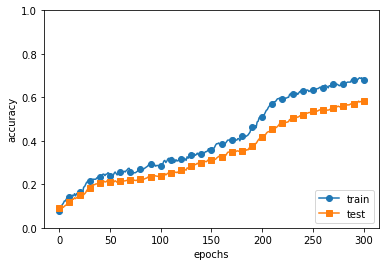

In [8]:
#使用dropout_ratio=0.2的dropout
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 为了再现过拟合，减少学习数据
x_train = x_train[:300]
t_train = t_train[:300]

# 设定是否使用Dropuout，以及比例 ========================
use_dropout = True  # 不使用Dropout的情况下为False
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# 绘制图形==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

对比没有使用Dropout和使用了Dropout的两种图发现通过使用 Dropout，训练数据和测试数据的识别精度的差距变小了。并且，训练数据也没有到达 100% 的识别精度。通过使用 Dropout，即便是表现力强的网络，也可以抑制过拟合。

# 3.超参数的验证
神经网络中，除了权重和偏置等参数，超参数（hyper-parameter）也经常出现。这里所说的超参数是指，比如各层的神经元数量、batch 大小、参数更新时的学习率或权值衰减等。
### 验证数据
调整超参数时，必须使用超参数专用的确认数据。用于调整超参数的数据，一般称为验证数据（validation data）。
### 超参数的最优化
#### 步骤 0

设定超参数的范围。

#### 步骤 1

从设定的超参数范围中随机采样。

#### 步骤 2

使用步骤 1 中采样到的超参数的值进行学习，通过验证数据评估识别精度（但是要将 epoch 设置得很小）。

#### 步骤 3

重复步骤 1 和步骤 2（100 次等），根据它们的识别精度的结果，缩小超参数的范围。

val acc:0.12 | lr:4.220024254948603e-05, weight decay:6.8043881360994855e-06
val acc:0.09 | lr:5.1206800727716206e-05, weight decay:3.056121612286621e-05
val acc:0.11 | lr:0.00033435816008183585, weight decay:5.611312252587346e-08
val acc:0.09 | lr:1.9434994260541707e-05, weight decay:4.26847923136823e-05
val acc:0.1 | lr:7.893843119385101e-06, weight decay:2.0293246398364112e-07
val acc:0.15 | lr:0.0003994187963411054, weight decay:2.7915409161007518e-05
val acc:0.1 | lr:0.00026242981630831766, weight decay:2.5831785780591586e-06
val acc:0.11 | lr:7.470013456212507e-05, weight decay:3.339825166878244e-07
val acc:0.06 | lr:1.0804384493502319e-05, weight decay:3.003096737809394e-08
val acc:0.54 | lr:0.004256994319632234, weight decay:2.472058420404415e-07
val acc:0.25 | lr:0.0008262298055279907, weight decay:5.050665772517885e-07
val acc:0.03 | lr:1.8248897083274983e-05, weight decay:6.496113315984234e-08
val acc:0.48 | lr:0.0026776053002734355, weight decay:3.467652499804316e-08
val ac

Best-6(val acc:0.65) | lr:0.005919566477578984, weight decay:1.1130854153667226e-05
Best-7(val acc:0.64) | lr:0.005444248218610088, weight decay:2.6834458058309055e-06
Best-8(val acc:0.63) | lr:0.006415643783812226, weight decay:8.001169621195922e-08
Best-9(val acc:0.6) | lr:0.004570362389589102, weight decay:1.5566195972341041e-06
Best-10(val acc:0.6) | lr:0.005469745095642717, weight decay:4.1134763543050924e-07
Best-11(val acc:0.57) | lr:0.003255008194541719, weight decay:1.2655951438357776e-07
Best-12(val acc:0.54) | lr:0.004256994319632234, weight decay:2.472058420404415e-07
Best-13(val acc:0.49) | lr:0.0042731122843100875, weight decay:1.2335479969912731e-08
Best-14(val acc:0.49) | lr:0.003620712947836971, weight decay:2.846472293318346e-06
Best-15(val acc:0.48) | lr:0.0026776053002734355, weight decay:3.467652499804316e-08
Best-16(val acc:0.45) | lr:0.002659103993208956, weight decay:1.005044546325895e-06
Best-17(val acc:0.41) | lr:0.00271689954750163, weight decay:2.48501345282

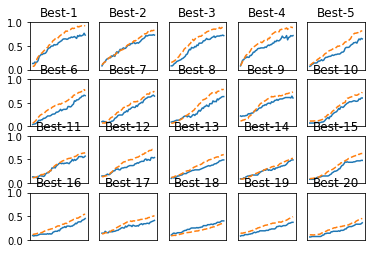

In [14]:
#超参数最优化的python实现

from common.util import shuffle_dataset
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 为了实现高速化，减少训练数据
x_train = x_train[:500]
t_train = t_train[:500]

# 分割验证数据
validation_rate = 0.20
validation_num = x_train.shape[0] * validation_rate
validation_num = int(validation_num)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list


# 超参数的随机搜索======================================
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 指定搜索的超参数的范围===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

# 绘制图形========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()


上图中，按识别精度从高到低的顺序【】排列了验证数据的学习的变化。从图中可知，Best-5学习进行的都很顺利。我们观察一下"Best-5"之前的超参数的值，发现学习率在 0.001 到 0.01、权值衰减系数在 10-8 到 10-6 之间时，学习可以顺利进行。

### 本章小结
* 参数的更新方法，除了 SGD 之外，还有 Momentum、AdaGrad、Adam 等方法。
* 权重初始值的赋值方法对进行正确的学习非常重要。
* 作为权重初始值，Xavier 初始值、He 初始值等比较有效。
* 通过使用 Batch Normalization，可以加速学习，并且对初始值变得健壮。
* 抑制过拟合的正则化技术有权值衰减、Dropout 等。
* 逐渐缩小“好值”存在的范围是搜索超参数的一个有效方法。